# Build Custom Data
- In this file we will see how to make a custom dataset using pytorh that will pass to the model for training.

# Import Packages

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets
from torchvision import transforms

# Load dataset
- In this file we will use this rice seed dataset
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
- Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features.
- These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used.

In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
rice-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

# Data Preprocessing
- We will remove the corrupted images

In [4]:
import os
from PIL import Image

In [5]:
def remove_corrupt_images(main_path):
    try:
        dirs = os.listdir('Rice_Image_Dataset')

        for img_folder in dirs:
            img_dir = os.path.join('Rice_Image_Dataset',img_folder)
            if os.path.isdir(img_dir):
                # get the image image
                for img in os.listdir(img_dir):
                    if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
                        try:
                            img_path = os.path.join(img_dir,img)
                            img = Image.open(img_path)
                            img.verify()
                        except Exception as e:
                            print(e)
                    else:
                        print(f"Corrupted images {img}")
                        os.remove(os.path.join(img_dir,img))

    except Exception as e:
        return e

In [23]:
# Apply the function
remove_corrupt_images('Rice_Image_Dataset')

# Visulaize Data

In [26]:
import matplotlib.pyplot as plt
import random

# Function to display random images from each rice variety
def visualize_images(data_dir, num_images_per_variety=3):
    """Visualizes random images from each rice variety."""

    try:
        variety_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

        plt.figure(figsize=(15, 5 * len(variety_folders)))  # Adjust figure size based on number of varieties

        for i, variety in enumerate(variety_folders):
            variety_path = os.path.join(data_dir, variety)
            images = [f for f in os.listdir(variety_path) if os.path.isfile(os.path.join(variety_path, f)) and (f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'))]
            random_images = random.sample(images, min(num_images_per_variety, len(images)))

            for j, image_name in enumerate(random_images):
                image_path = os.path.join(variety_path, image_name)
                img = Image.open(image_path)
                plt.subplot(len(variety_folders), num_images_per_variety, i * num_images_per_variety + j + 1)
                plt.imshow(img)
                plt.title(f"{variety} - {image_name}")
                plt.axis('off')  # Turn off axis ticks and labels

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

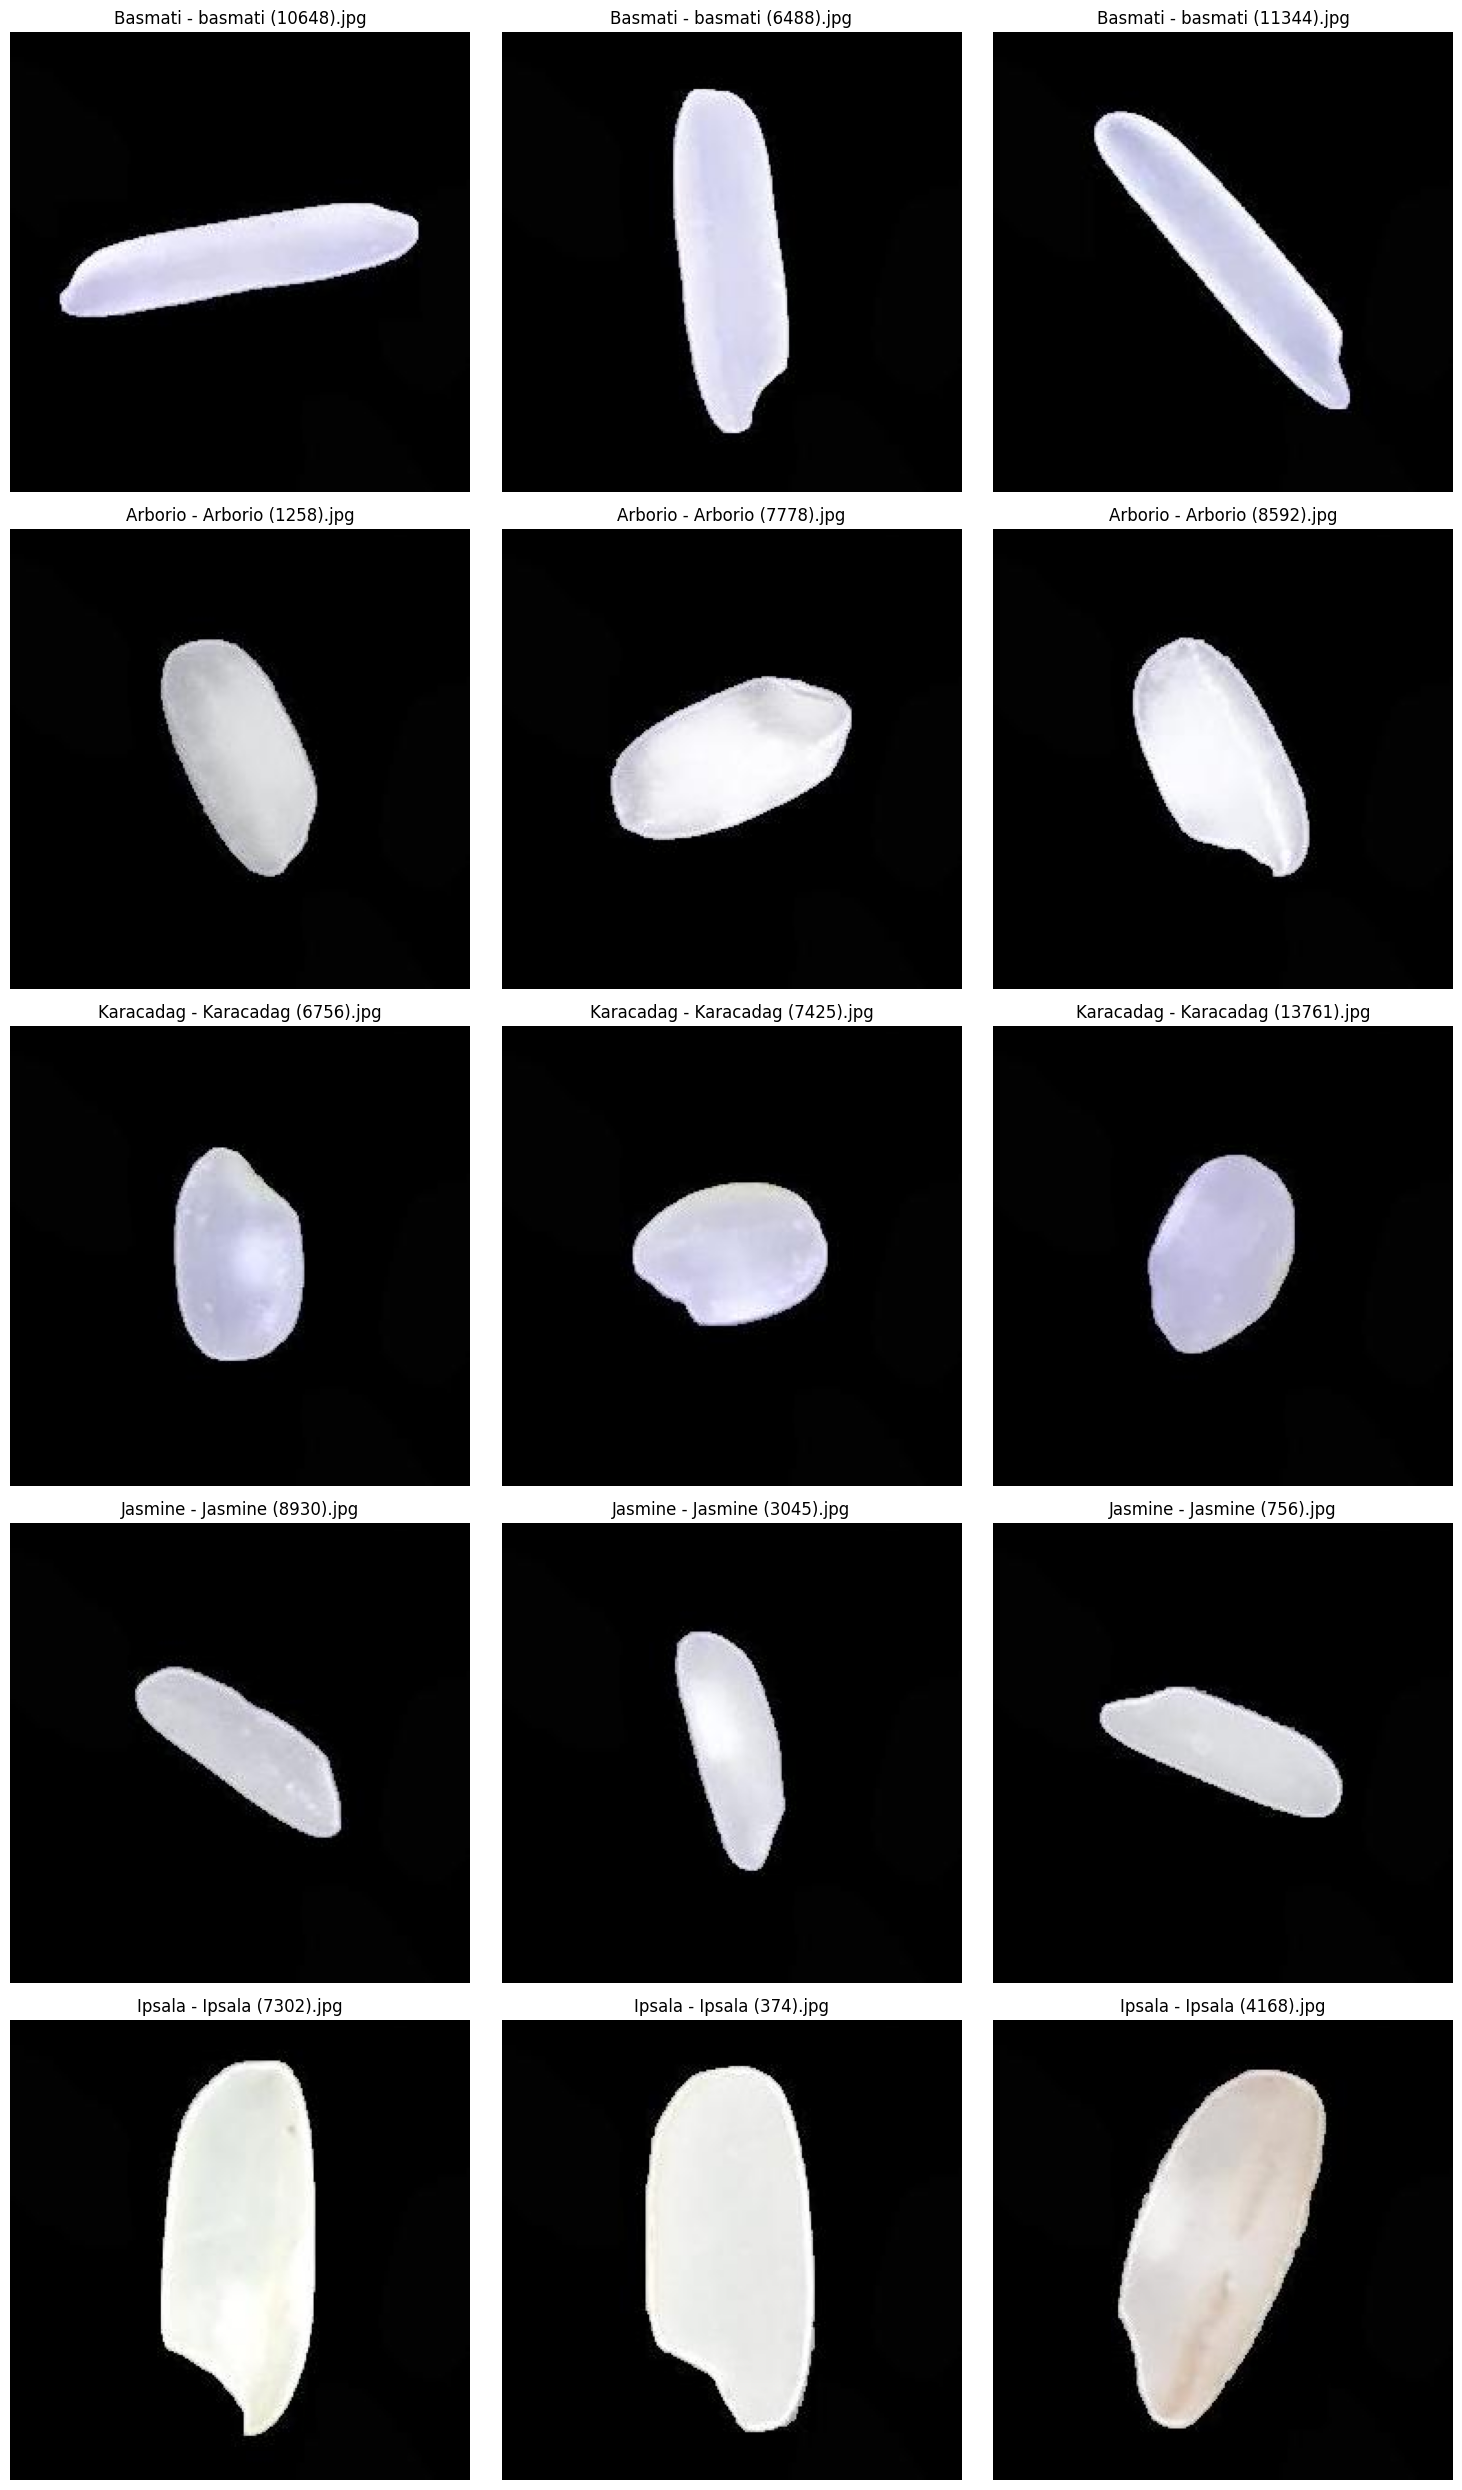

In [27]:
# Apply the visualization function
visualize_images('Rice_Image_Dataset')

# observation
- Now we can clean the dataset and visualize it.
- Now we can make a class for our dataset

In [6]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label,image_folder in enumerate(os.listdir(self.root_dir)):
            # verify the folder
            img_folder = os.path.join(self.root_dir,image_folder)
            if os.path.isdir(img_folder):
                # get the image path
                for img in os.listdir(img_folder):
                    # get the image full path
                    img_path = os.path.join(img_folder,img)
                    self.image_paths.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self,idx):
        # get the image and label path
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        # read the image
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image,label

In [11]:
# Make a transformation
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Data
data = CustomDataset(root_dir="/content/Rice_Image_Dataset",
                     transform=transform)
data

# Make a DataLoader
- Using `dataloader` we can efficently load the data.

In [12]:
# Data Loader
train_loader = DataLoader(data,batch_size=8,shuffle=True)

In [13]:
# dispaly the batch
for img,label in train_loader:
    print(img.shape)
    print(label)
    break

torch.Size([8, 3, 224, 224])
tensor([1, 5, 2, 2, 1, 0, 2, 0])


# Observation
- Now we can successfully make our custom data and we will directly pass the data to model for training.
- **Point to be Notes:**
    - In this file we `can't split the data in train and test set.`